<a href="https://colab.research.google.com/github/Alltristans/Financial-Data-Machine-Learning-Project/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Alridho_Tristan_Satriawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
!pip install gdown
import gdown

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
id = '12Vw-sS5QiL9NwBOkbCQxqn2IWaEU-bsx'
output = 'clustered_dataset.csv'
gdown.download(id=id, output=output, quiet=False)
df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=12Vw-sS5QiL9NwBOkbCQxqn2IWaEU-bsx
To: /content/clustered_dataset.csv
100%|██████████| 8.50M/8.50M [00:00<00:00, 45.1MB/s]


In [ ]:
df.head()

,Unnamed: 0,symbol,account,type,2020,2021,2022,2023,cluster
0,0,AALI,Accounts Payable,0,5.029488e+11,6.057948e+11,6.843420e+11,7.044059e+11,1
1,1,AALI,Accounts Receivable,0,5.029488e+11,4.581350e+11,6.843420e+11,6.744870e+11,1
2,2,AALI,Accumulated Depreciation,0,-3.017693e+11,-3.634769e+11,-4.106052e+11,-4.226434e+11,3
3,3,AALI,Additional Paid In Capital,0,5.029488e+11,6.057948e+11,6.843420e+11,7.044059e+11,1
4,4,AALI,Allowance For Doubtful Accounts Receivable,0,-2.426100e+10,-2.454300e+10,-2.705700e+10,-2.651600e+10,2


In [ ]:
df = df.drop(columns=['symbol', 'account', 'type'])


In [ ]:
df.head()

,Unnamed: 0,2020,2021,2022,2023,cluster
0,0,5.029488e+11,6.057948e+11,6.843420e+11,7.044059e+11,1
1,1,5.029488e+11,4.581350e+11,6.843420e+11,6.744870e+11,1
2,2,-3.017693e+11,-3.634769e+11,-4.106052e+11,-4.226434e+11,3
3,3,5.029488e+11,6.057948e+11,6.843420e+11,7.044059e+11,1
4,4,-2.426100e+10,-2.454300e+10,-2.705700e+10,-2.651600e+10,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
X = df.drop('cluster', axis=1)
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (71394, 5)
Testing data shape: (17849, 5)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy}")

Akurasi model: 0.9950697518068239


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Random Forest Classifier adalah algoritma pembelajaran mesin yang termasuk dalam kategori ensemble learning. Algoritma ini bekerja dengan membangun banyak pohon keputusan (decision tree) dan menggabungkan prediksi dari setiap pohon untuk menghasilkan prediksi akhir yang lebih akurat dan robust.

Cara Kerja:



1.   Membuat Banyak Pohon Keputusan: Random Forest pertama-tama membuat banyak pohon keputusan. Setiap pohon dilatih menggunakan subset acak dari data pelatihan (bootstrap aggregating atau bagging) dan subset acak dari fitur (feature randomness).
2.   Prediksi dari Setiap Pohon: Ketika data baru diberikan, setiap pohon keputusan dalam forest akan membuat prediksi kelasnya sendiri.
3.   Voting untuk Prediksi Akhir: Random Forest menggabungkan prediksi dari semua pohon dengan melakukan voting. Untuk tugas klasifikasi, kelas yang mendapatkan suara terbanyak dari pohon-pohon tersebut akan menjadi prediksi akhir model.


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.9950697518068239
Precision: 0.9950747914283631
Recall: 0.9950697518068239
F1-score: 0.9950712214231946


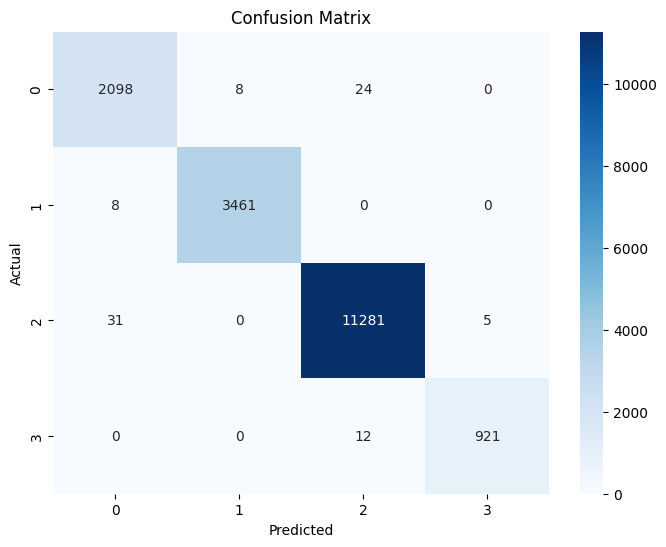

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

**Metrik Evaluasi:**



*   Accuracy: 0.9950
*   Precision: 0.9950
*   Recall: 0.9950
*   F1-score: 0.9950

**Analisis:**



*   Model Random Forest Classifier menunjukkan performa yang sangat baik dengan nilai accuracy, precision, recall, dan F1-score yang mendekati 1.
*   Ini menunjukkan bahwa model mampu memprediksi kelas cluster dengan sangat akurat.
*   Confusion matrix menunjukkan bahwa sebagian besar data diprediksi dengan benar, dengan hanya sedikit kesalahan prediksi.

**Kesimpulan:**

Berdasarkan hasil evaluasi, model Random Forest Classifier sangat efektif untuk tugas klasifikasi cluster pada dataset yang digunakan. Model ini memiliki akurasi yang tinggi dan mampu menggeneralisasi dengan baik pada data yang tidak terlihat.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.



*   Accuracy: 99.5%
*   Precision: 99.5%
*   Recall: 99.5%
*   F1-Score: 99.5%

**Analisis**: Random Forest menunjukkan performa sangat baik dengan semua skor 99.5% meskipun mengalami sedikit overfitting

**Rekomendasi** : Jika untuk mengurangi overfitting dapat dilakukan teknik regularisasi, mengurangi jumlah fitur, mencoba algoritma yang lebih sederhana, atau bisa tuning hyperparameter. Jika hasil belum memuaskan bisa eksplorasi algoritma lain atau melakukan feature engineering